In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.8/610.8 kB 6.8 MB/s eta 0:00:00


In [ ]:
pwd

'/content'

In [ ]:
# !yolo task=detect mode=predict model=yolov8n.pt source="images/test2.jpg"

In [ ]:
!nvidia-smi

Sat Aug 26 16:01:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!ls

data	   llm.ipynb	  runs		   Yolov8.ipynb
data.yaml  pymongo.ipynb  Untitled0.ipynb  yolov8s.pt


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=35 plots=True

/content/drive/MyDrive/Colab Notebooks
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=35, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fal

In [ ]:
!ls runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1690136428.8c0a30f917f4.1439.0  train_batch80.jpg
F1_curve.png					    train_batch81.jpg
P_curve.png					    train_batch82.jpg
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    val_batch1_labels.jpg
results.png					    val_batch1_pred.jpg
train_batch0.jpg				    weights


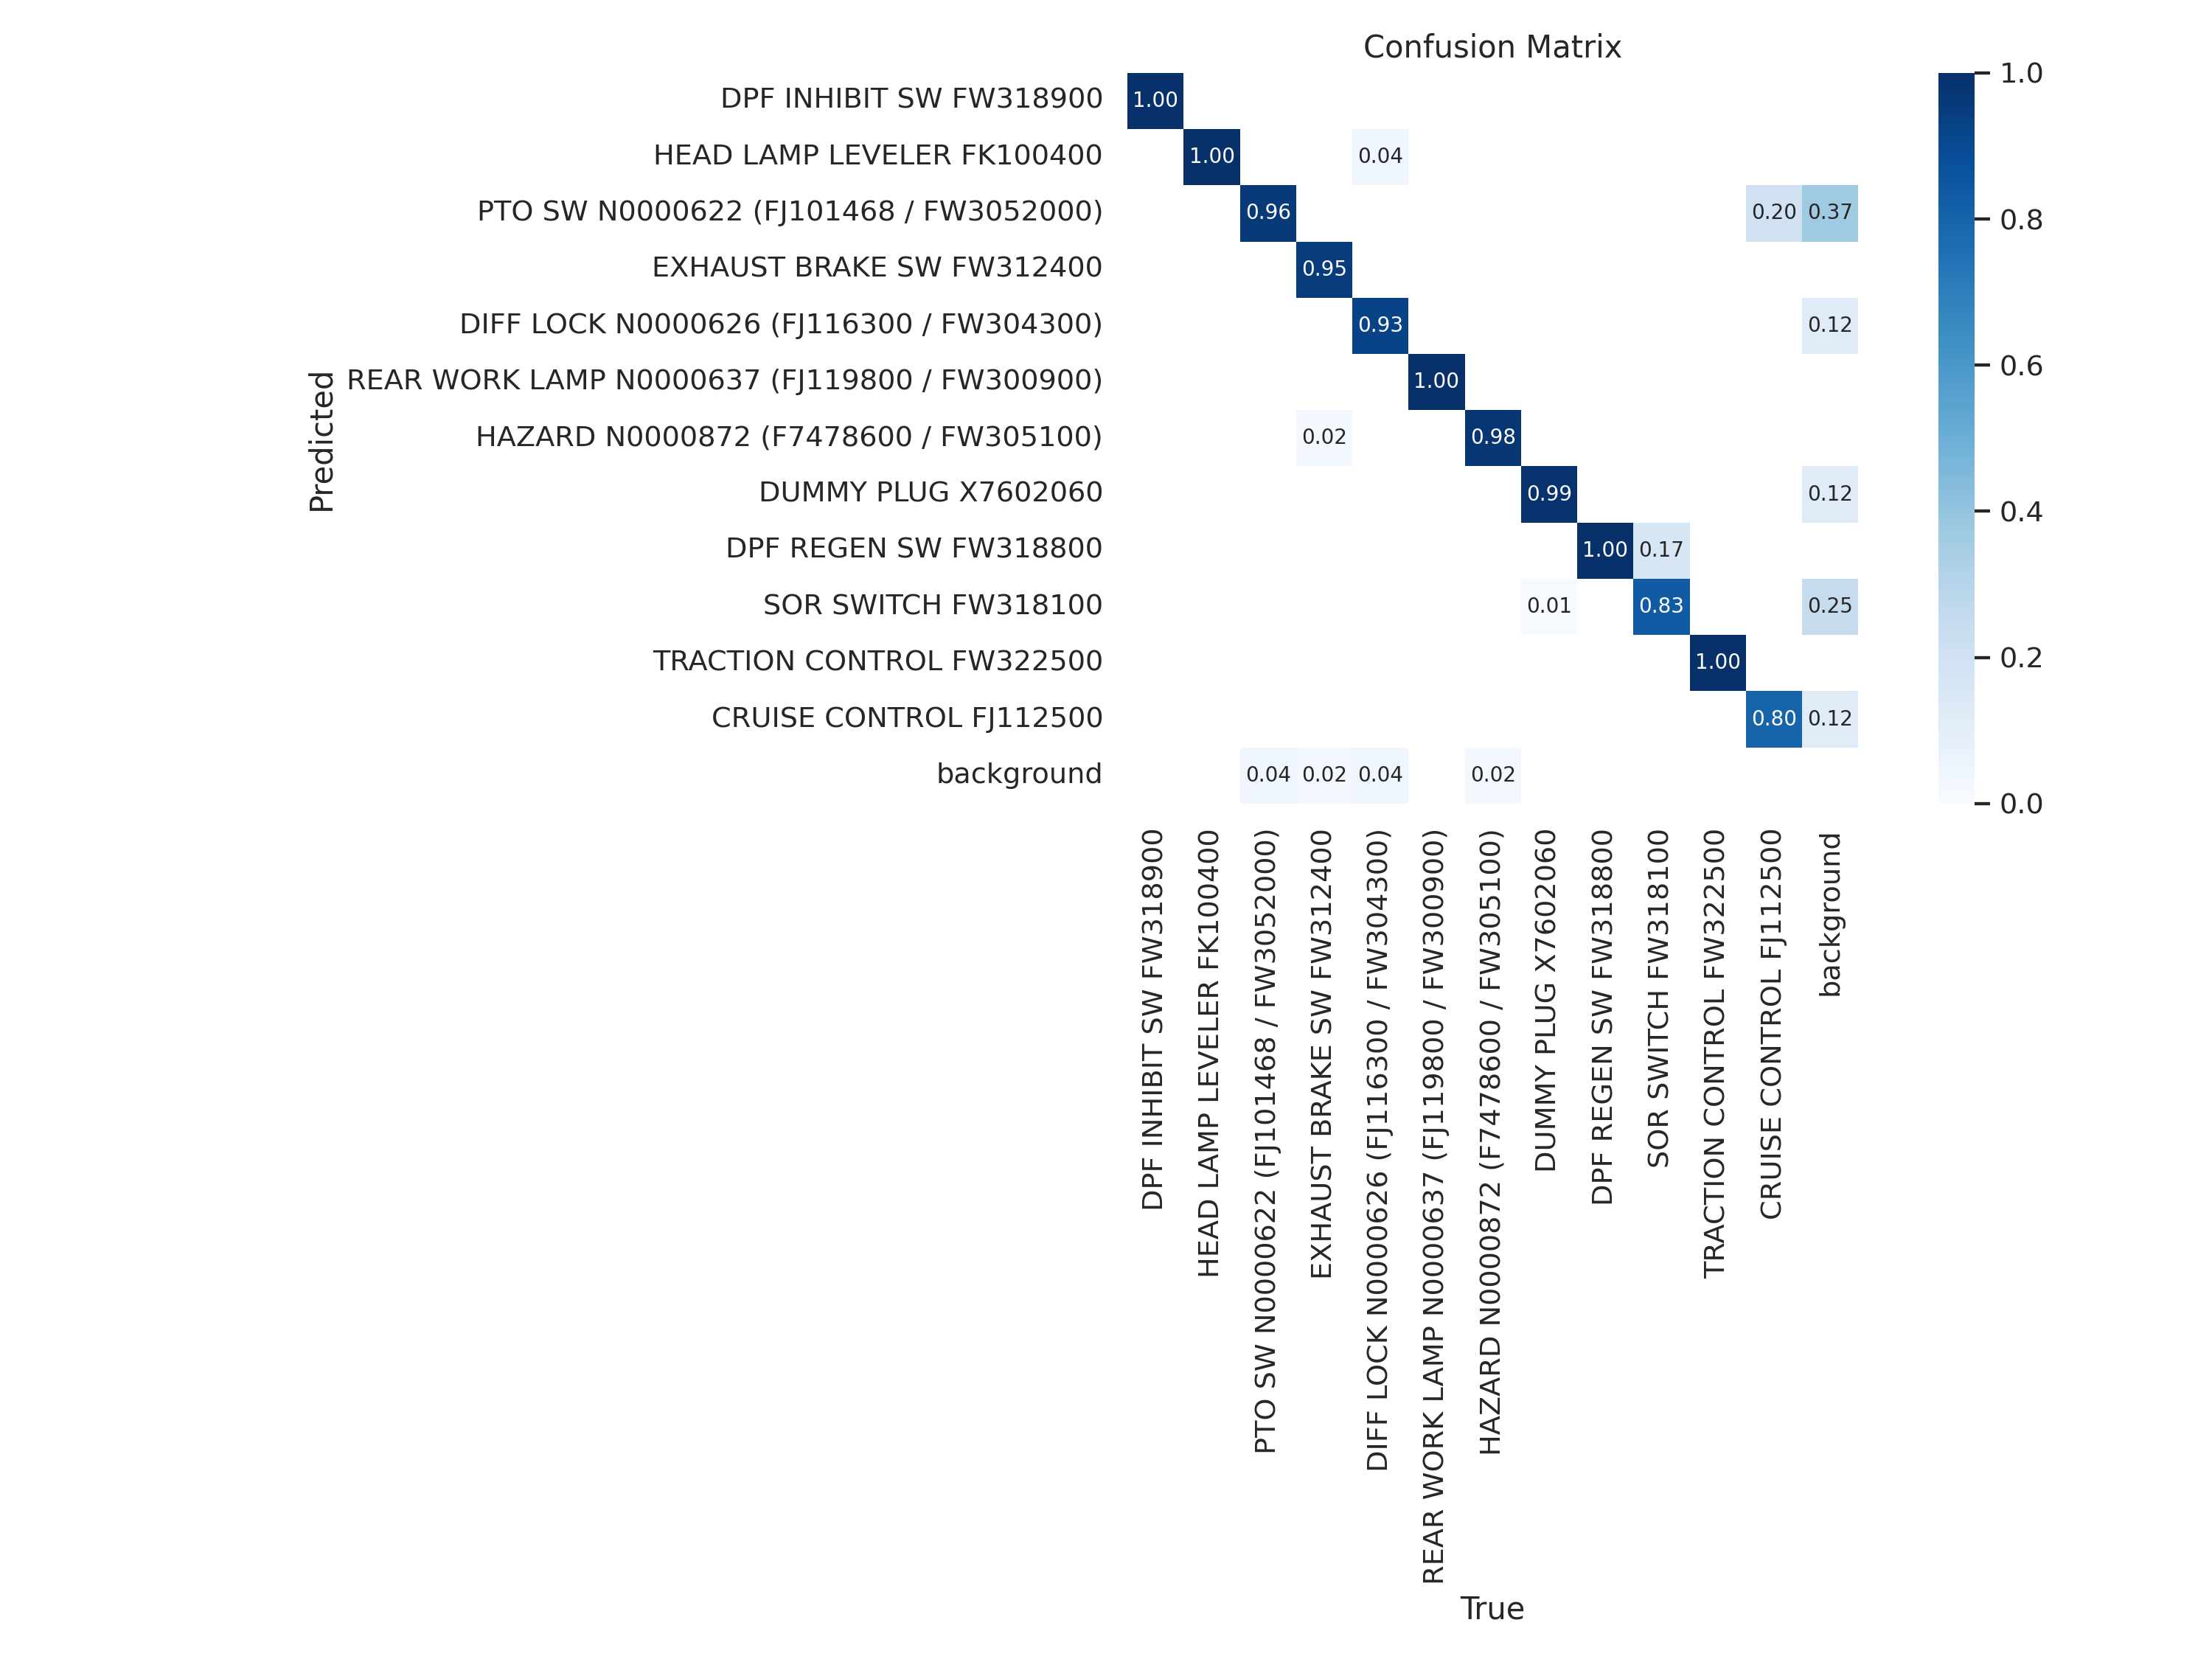

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png',width=600)

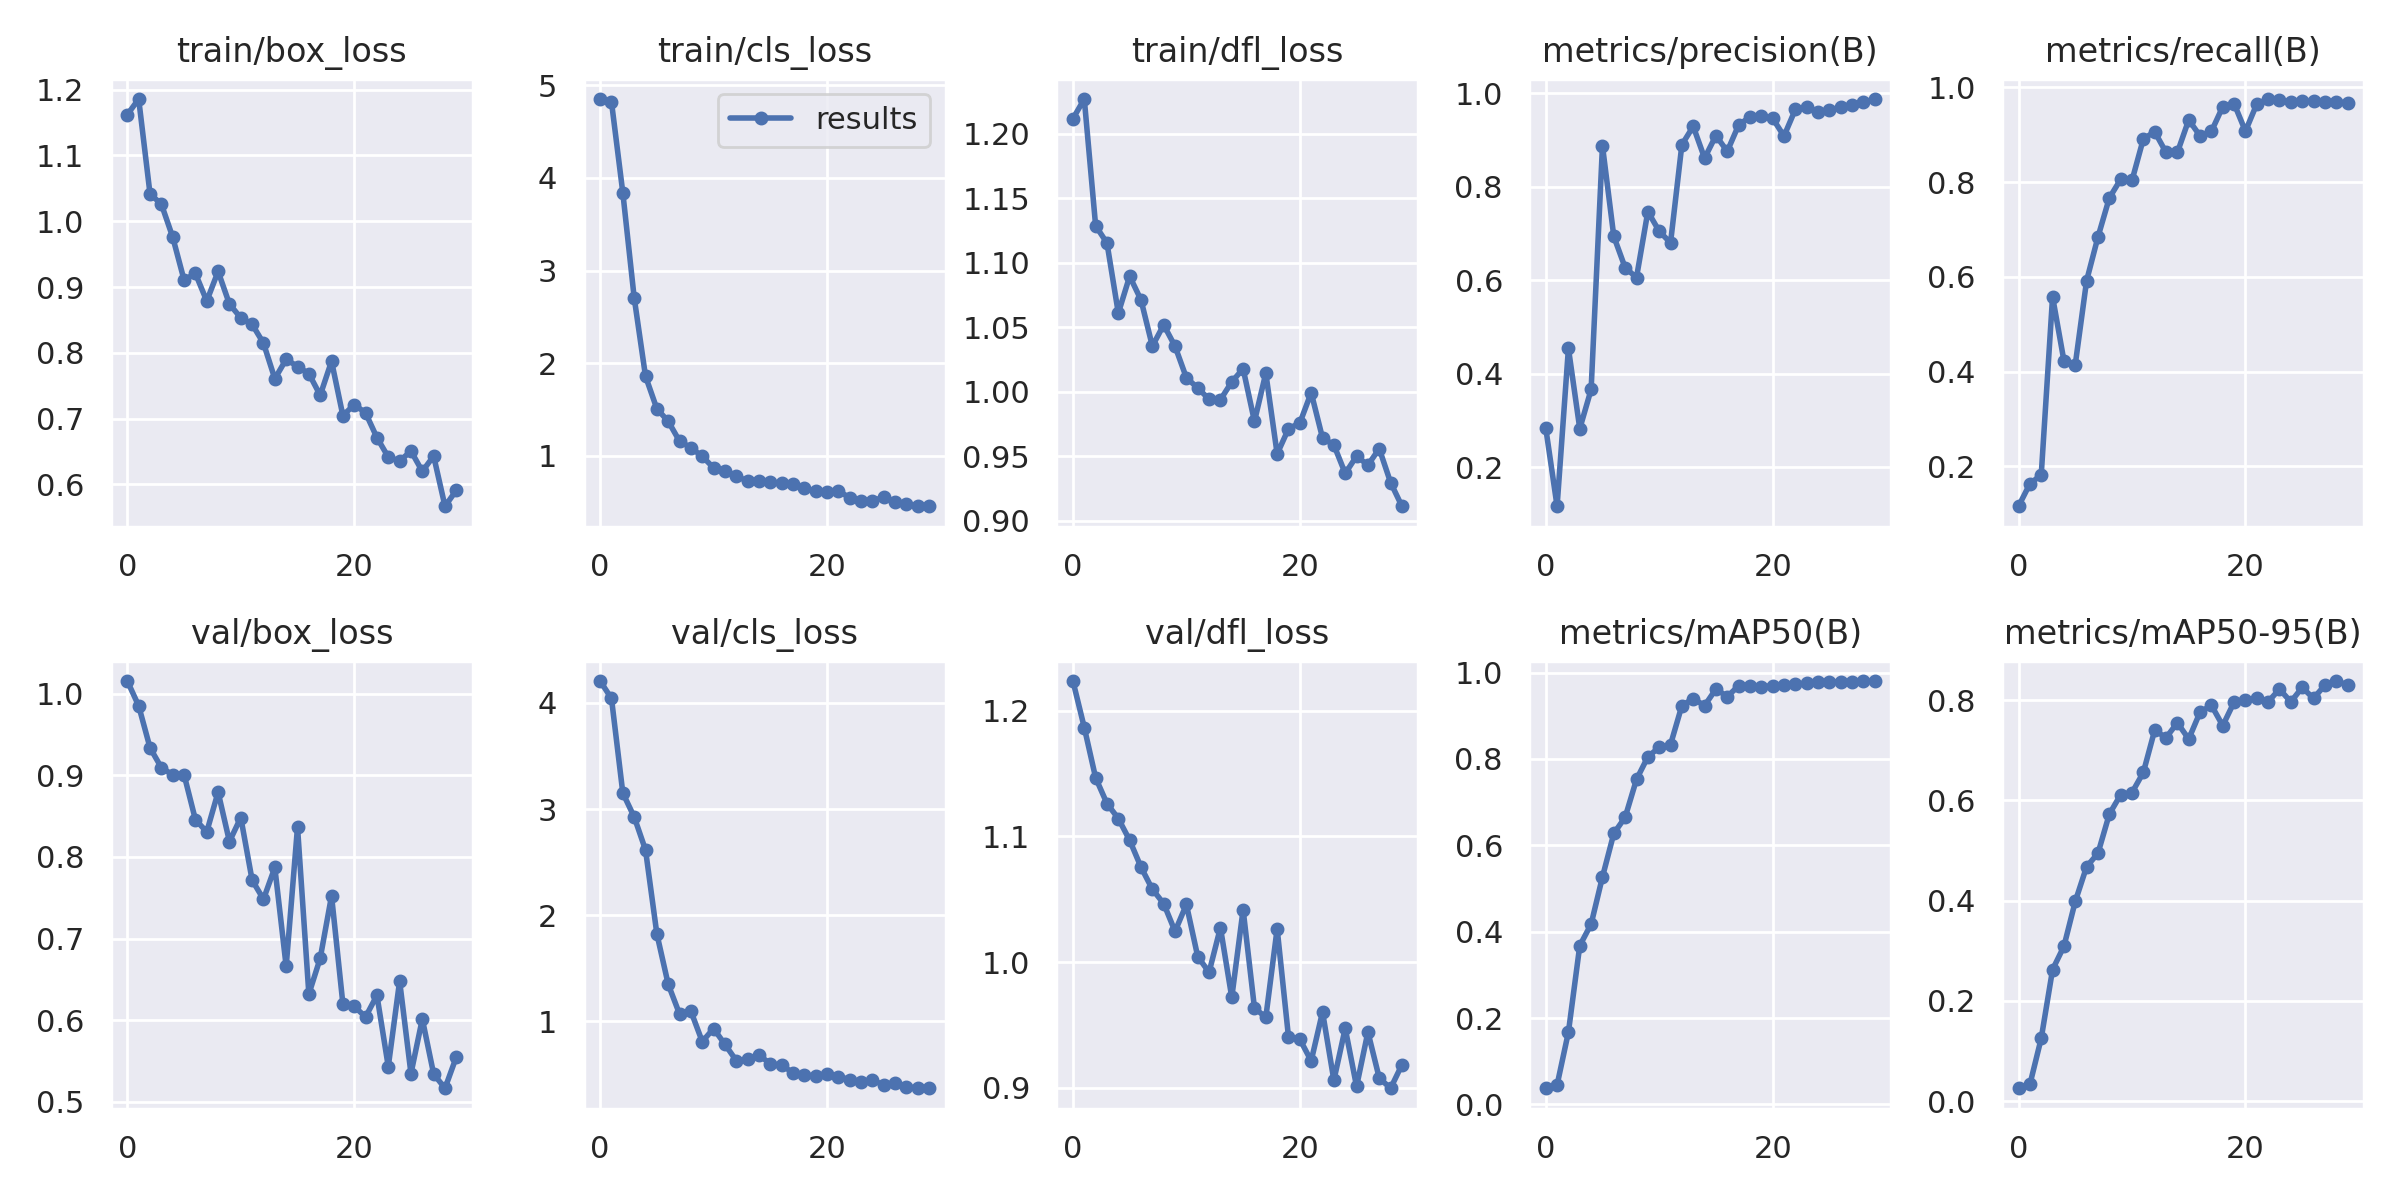

In [ ]:
Image(filename='runs/detect/train/results.png',width=600)

## Validation of custom model

In [ ]:
result = !yolo task=detect mode=val model=runs/detect/train13/weights/best.pt data=data.yaml

In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

## prediciton

In [ ]:
result = !yolo task=detect mode=predict model=runs/detect/train20/weights/best.pt conf=0.45 source=data/train/images/shad.jpg
result[5]
strin=str("")
for i in result[5]:
  strin = strin + str(i)
  if i == ',' or i==':':
    print(strin,end='\n')
    strin=""

image 1/1 /content/drive/MyDrive/Colab Notebooks/data/train/images/shad.jpg:
 512x640 1 DPF INHIBIT SW FW318900,
 1 HEAD LAMP LEVELER FK100400,
 1 PTO SW N0000622 (FJ101468 / FW305200),
 1 EXHAUST BRAKE SW FW312400,
 1 DIFF LOCK N0000626 (FJ116300 / FW304300),
 1 REAR WORK LAMP N0000637 (FJ119800 / FW300900),
 1 HAZARD N0000872 (F7478600 / FW305100),
 1 DUMMY PLUG X7602060,
 1 DPF REGEN SW FW318800,
 1 SOR SWITCH FW318100,
 1 TRACTION CONTROL FW322500,


In [ ]:
result = !yolo task=detect mode=predict model=runs/detect/train19/weights/best.pt source=data/train/images/2023-08-24.jpg


In [ ]:
result[5]

'image 1/1 /content/drive/MyDrive/Colab Notebooks/data/train/images/2023-08-24.jpg: 480x640 1 DPF INHIBIT SW FW318900, 1 HEAD LAMP LEVELER FK100400, 1 PTO SW N0000622 (FJ101468 / FW3052000), 1 EXHAUST BRAKE SW FW312400, 1 DIFF LOCK N0000626 (FJ116300 / FW304300), 1 REAR WORK LAMP N0000637 (FJ119800 / FW300900), 1 HAZARD N0000872 (F7478600 / FW305100), 1 DPF REGEN SW FW318800, 1 CRUISE CONTROL FJ112500, 65.3ms'

In [ ]:
strin=str("")
for i in result[5]:
  strin = strin + str(i)
  if i == ',' or i==':':
    print(strin,end='\n')
    strin=""

image 1/1 /content/drive/MyDrive/Colab Notebooks/data/train/images/2023-08-24.jpg:
 480x640 1 DPF INHIBIT SW FW318900,
 1 HEAD LAMP LEVELER FK100400,
 1 PTO SW N0000622 (FJ101468 / FW3052000),
 1 EXHAUST BRAKE SW FW312400,
 1 DIFF LOCK N0000626 (FJ116300 / FW304300),
 1 REAR WORK LAMP N0000637 (FJ119800 / FW300900),
 1 HAZARD N0000872 (F7478600 / FW305100),
 1 DPF REGEN SW FW318800,
 1 CRUISE CONTROL FJ112500,


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
result = !yolo task=detect mode=predict model=runs/detect/train19/weights/best.pt conf=0.45 source=data/train/images/2023-08-24.jpg
